In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sms=pd.read_csv('spam.csv',sep=',',encoding='Latin-1')

sms=pd.read_csv('spam.csv',sep=',',encoding='Latin-1')
print(sms.shape)
sms.head(10)
                                                                                                                                                                                                                                                                        


(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [21]:
sms=sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms.columns=['label','texts']
print(sms.shape)
sms.head()




(5572, 2)


,label,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


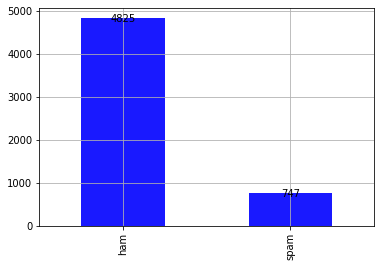

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
sms['label'].value_counts().plot(kind='bar',color='blue',alpha=0.9,grid=True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')

In [25]:
from string import punctuation
def preprocess1 (str):
    """ str --> str
    lower case and strip punctuations of a string
    """
    for p in list(punctuation):
        str = str.lower().replace(p, '')
    return str
sms['texts'] = sms.texts.apply(preprocess1)

#creating word count feature as "word_count"
def word_count (str):
    """str --> int
    return the number of words appeared in a string
    """
    return len(str.split())
sms['word_count'] = sms.texts.apply(word_count)

#creating character count feature as "char_count"
def char_count (str):
    """ str --> int
    return the number of character count of a string
    """
    return len(list(str))
sms['char_count'] = sms.texts.apply(char_count)

#vew new data set
print(sms.shape)
sms.head()

(5572, 4)


,label,texts,word_count,char_count
0,ham,go until jurong point crazy available only in ...,20,102
1,ham,ok lar joking wif u oni,6,23
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,149
3,ham,u dun say so early hor u c already then say,11,43
4,ham,nah i dont think he goes to usf he lives aroun...,13,59


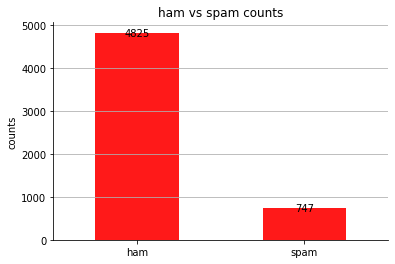

In [40]:
#visualize ham vs spam counts
fig = plt.figure()
ax = fig.add_subplot(111)
sms['label'].value_counts().plot(kind='bar', color = 'red', alpha=0.9, grid=True)
plt.ylabel('counts')
plt.title('ham vs spam counts')
plt.xticks(rotation='horizontal')
ax.xaxis.grid(which="major")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')

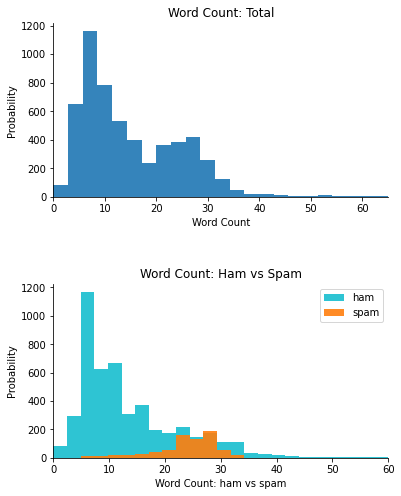

In [45]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(sms['word_count'],  bins=60, color='#1f77b4', alpha=0.9)
plt.xlim(0,65)
plt.xlabel('Word Count')
plt.ylabel('Probability')
plt.title('Word Count: Total')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((sms.loc[sms.label=='ham']['word_count'], sms.loc[sms.label=='spam']['word_count'])), bins=70)[1]
plt.hist(sms.loc[sms.label=='ham']['word_count'], bins, color='#17becf', alpha=0.9, label='ham')
plt.hist(sms.loc[sms.label=='spam']['word_count'], bins,  color='#ff7f0e', alpha=0.9, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 60)
plt.xlabel('Word Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Word Count: Ham vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)